In [42]:
import pandas as pd
df=pd.read_excel("globalterrorismdb_0522dist.xlsx",engine="openpyxl")

newdf=df[df["iyear"]>=1990]
newdf.head()
newdf=newdf[["iyear","country_txt","region_txt","attacktype1_txt","targtype1_txt","gname","nkill","nwound"]]
newdf.columns=["year","country","region","attack type","target type","terrorist","deaths","wounded"]


In [45]:
newdf["casualty"]=newdf["deaths"]+newdf["wounded"]

In [48]:
gtd=newdf.copy()

In [50]:
newdf

,year,country,region,attack type,target type,terrorist,deaths,wounded,casualty
41069,1990,Lebanon,Middle East & North Africa,Hostage Taking (Kidnapping),Journalists & Media,Unknown,0.0,0.0,0.0
41070,1990,India,South Asia,Bombing/Explosion,Government (General),Unknown,0.0,0.0,0.0
41071,1990,India,South Asia,Bombing/Explosion,Business,Unknown,0.0,0.0,0.0
41072,1990,India,South Asia,Bombing/Explosion,Transportation,Unknown,0.0,0.0,0.0
41073,1990,Bolivia,South America,Bombing/Explosion,Religious Figures/Institutions,Alejo Calatayu,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209701,2020,Yemen,Middle East & North Africa,Bombing/Explosion,Private Citizens & Property,Houthi extremists (Ansar Allah),NaN,NaN,NaN
209702,2020,Yemen,Middle East & North Africa,Bombing/Explosion,Private Citizens & Property,Houthi extremists (Ansar Allah),NaN,NaN,NaN
209703,2020,Germany,Western Europe,Facility/Infrastructure Attack,Military,Left-wing extremists,0.0,0.0,0.0
209704,2020,Afghanistan,South Asia,Armed Assault,Private Citizens & Property,Unknown,1.0,0.0,1.0


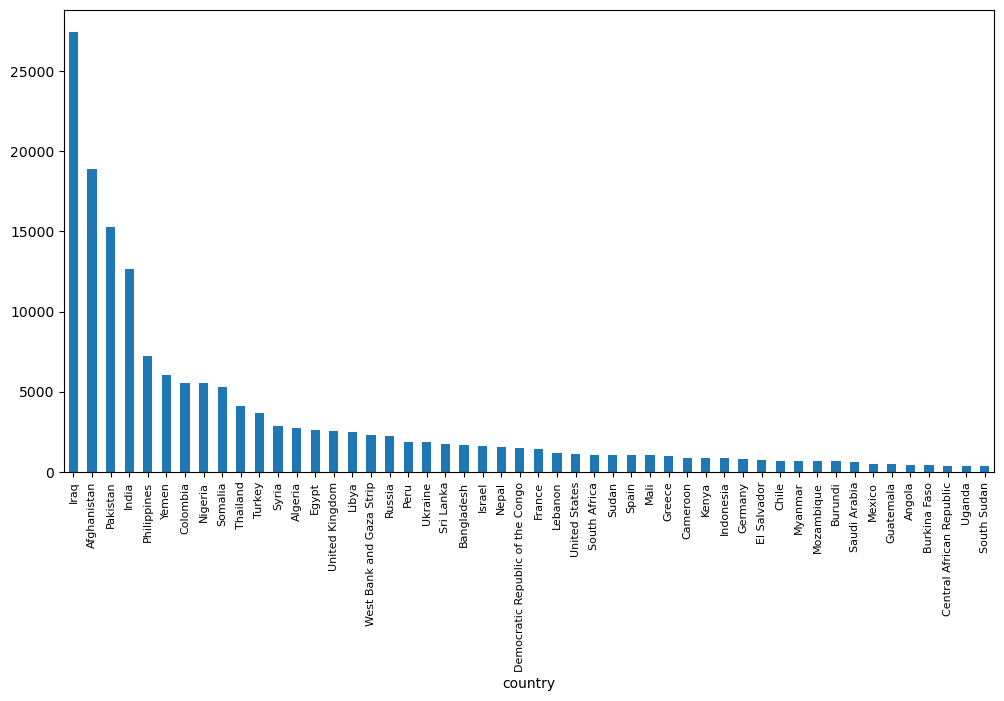

In [51]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
newdf
newdf.head()
plt.figure(figsize=(12,6))
newdf["country"].value_counts()[:50].plot(kind="bar")
plt.xticks(fontsize=8)
plt.show()

In [52]:
temp1=newdf["country"].value_counts()[:10]
temp1

country
Iraq           27485
Afghanistan    18894
Pakistan       15291
India          12677
Philippines     7229
Yemen           6027
Colombia        5545
Nigeria         5543
Somalia         5299
Thailand        4101
Name: count, dtype: int64

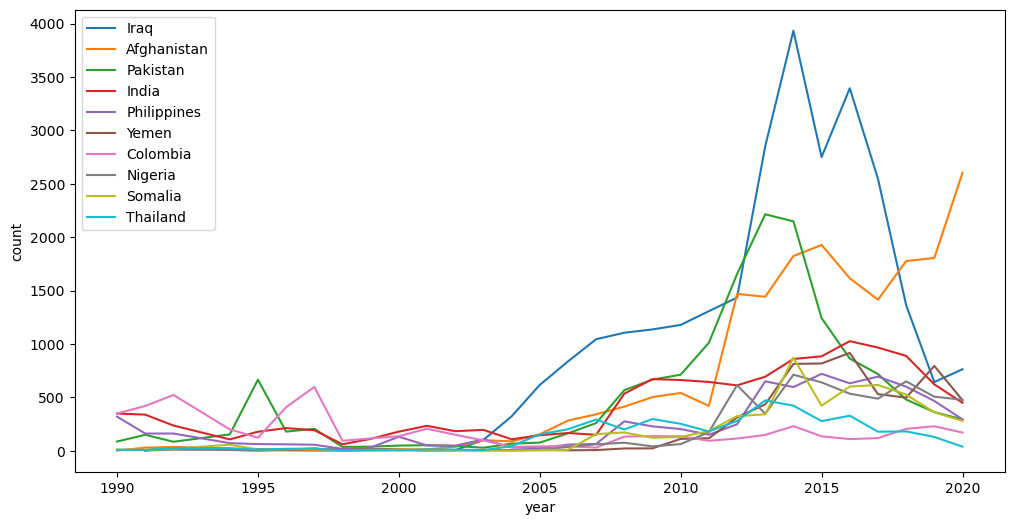

In [53]:
plt.figure(figsize=(12,6))
for i in temp1.index:

    freq=newdf[newdf["country"]==i]
    temp=freq.value_counts("year").sort_index()
    sns.lineplot(temp,label=i)






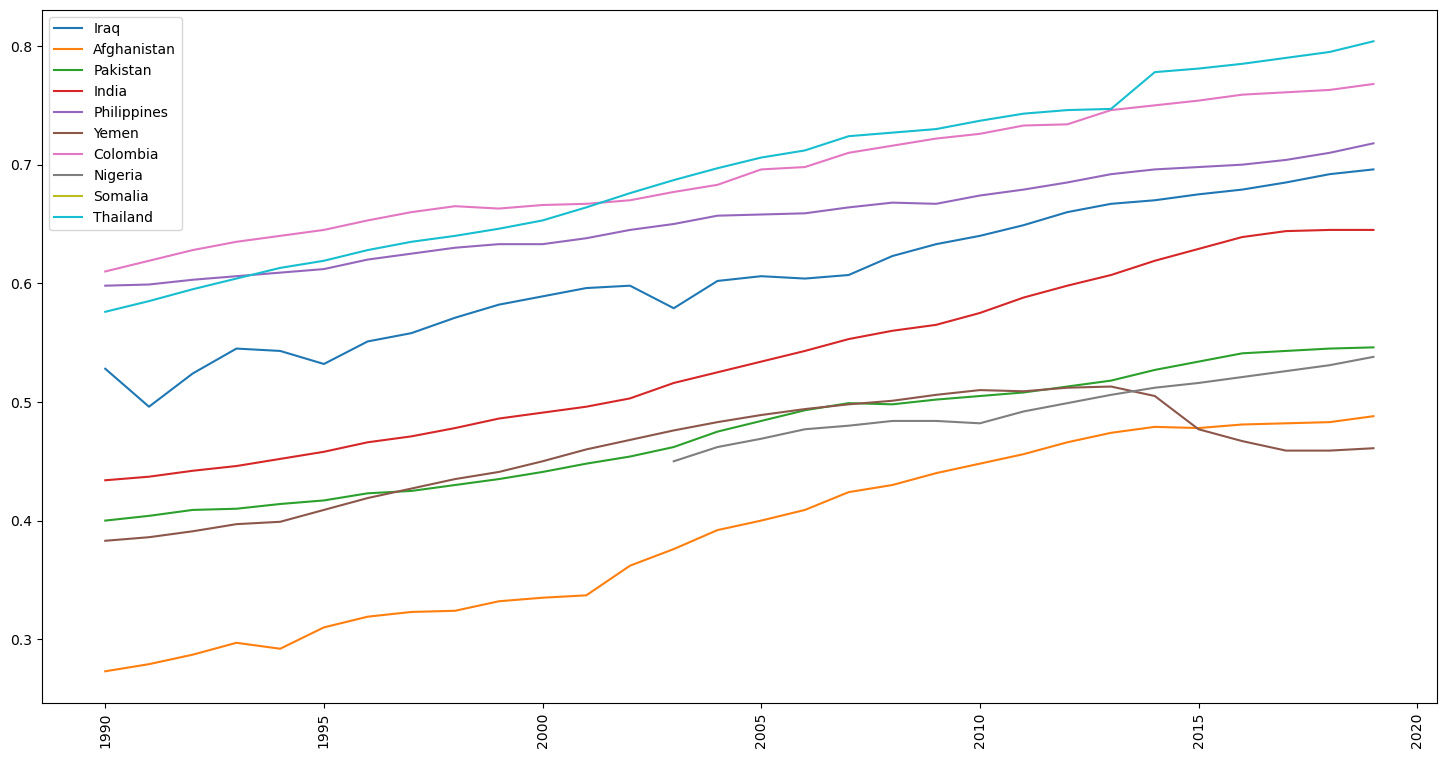

In [54]:
devdata=pd.read_csv("Human Development Index - Full.csv")
hdi=devdata.copy()
plt.figure(figsize=(18,9))
for i in temp1.index:
    ins=devdata[devdata["Country"]==i]
    mylist=[]
    yearlist=[]
    ins.values[0]
    for k in range(1990,2020):
        yearlist.append(k)
    for k in range(5,35):
        mylist.append(ins.values[0][k])
    plt.plot(yearlist,mylist,label=i)

plt.xticks(rotation=90)
plt.legend()
plt.show()


In [55]:
devdata[devdata["Country"]=="Somalia"]
mylist=[]
mylist.append("Country")
for i in range(1990,2021):
    res="Human Development Index ("+str(i)+")"
    mylist.append(res)
heylist=[]
heylist.append("country")
for i in range(1990,2021):
    res=str(i)
    heylist.append(res)
hdi=devdata.copy()

hdi=hdi[mylist]
hdi.columns=heylist
hdi


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,0.273,0.279,0.287,0.297,0.292,0.310,0.319,0.323,0.324,...,0.456,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.526,0.541,0.552,0.563,0.582,0.596,0.597,0.595,0.595,0.590
2,Albania,0.647,0.629,0.614,0.617,0.624,0.634,0.645,0.642,0.657,...,0.766,0.778,0.785,0.792,0.795,0.798,0.802,0.806,0.810,0.794
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.849,0.869,0.864,0.871,0.867,0.871,0.868,0.872,0.873,0.848
4,United Arab Emirates,0.728,0.739,0.742,0.748,0.755,0.762,0.767,0.773,0.779,...,0.840,0.846,0.852,0.859,0.865,0.870,0.897,0.909,0.920,0.912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,NaN,NaN,NaN,NaN,NaN,0.659,0.668,0.670,0.674,...,0.713,0.709,0.710,0.711,0.716,0.717,0.716,0.716,0.715,0.712
191,Yemen,0.383,0.386,0.391,0.397,0.399,0.409,0.419,0.427,0.435,...,0.509,0.512,0.513,0.505,0.477,0.467,0.459,0.459,0.461,0.460
192,South Africa,0.632,0.641,0.647,0.652,0.658,0.661,0.656,0.651,0.644,...,0.686,0.696,0.704,0.712,0.716,0.719,0.720,0.726,0.736,0.727
193,Zambia,0.412,0.408,0.408,0.414,0.411,0.413,0.414,0.413,0.411,...,0.534,0.548,0.554,0.557,0.562,0.564,0.568,0.572,0.575,0.570


In [56]:
devdata.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95


In [57]:
newdf["attack type"].value_counts()

attack type
Bombing/Explosion                      79704
Armed Assault                          40427
Assassination                          14376
Hostage Taking (Kidnapping)            12391
Unknown                                 9672
Facility/Infrastructure Attack          9668
Unarmed Assault                         1160
Hostage Taking (Barricade Incident)      653
Hijacking                                586
Name: count, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [60]:
attacks = gtd.groupby(["country", "year","region"]).size().reset_index(name="attacks_count")

attacks.sort_values(["country","year"])
attacks.dtypes


country          object
year              int64
region           object
attacks_count     int64
dtype: object

In [26]:
hdi_long = hdi.melt(
    id_vars="country",
    var_name="year",
    value_name="hdi"
)
hdi_long["year"]=hdi_long["year"].astype(int)
hdi_long.dtypes


country     object
year         int64
hdi        float64
dtype: object

In [27]:
merged_df = pd.merge(
    hdi_long,
    attacks,
    on=["country", "year"],
    how="inner"
)
merged_df.dropna() ######## data is now ready to apply machine learning methods
merged_df.isnull().sum()
merged_df.dropna(inplace=True)

In [28]:
merged_df

,country,year,hdi,region,attacks_count
0,Afghanistan,1990,0.273,South Asia,2
2,Albania,1990,0.647,Eastern Europe,1
3,Argentina,1990,0.723,South America,31
4,Austria,1990,0.825,Western Europe,1
5,Belgium,1990,0.816,Western Europe,2
...,...,...,...,...,...
2551,United States,2020,0.920,North America,103
2552,Venezuela,2020,0.695,South America,7
2553,Yemen,2020,0.460,Middle East & North Africa,474
2554,South Africa,2020,0.727,Sub-Saharan Africa,17


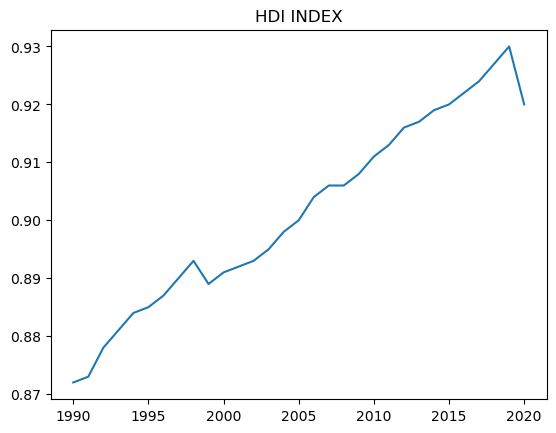

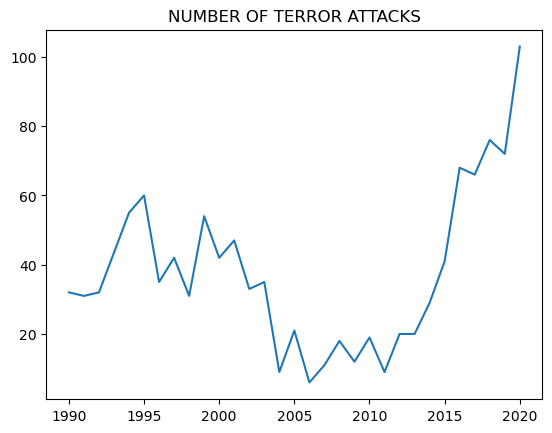

In [29]:
temp=merged_df[merged_df["country"]=="United States"]
plt.plot(temp["year"],temp["hdi"])
plt.title("HDI INDEX")
plt.show()
plt.plot(temp["year"],temp["attacks_count"])
plt.title("NUMBER OF TERROR ATTACKS")
plt.show()

In [30]:
merged_df[(merged_df["country"]=="Lebanon") & (merged_df["year"]==1998)]

,country,year,hdi,region,attacks_count


In [31]:
merged_df.to_excel("dsa201tpf.xlsx",index=False)

In [32]:
df_ml=merged_df.copy()

In [33]:
df_ml["log_attacks"] = np.log1p(df_ml["attacks_count"])

In [34]:
df_ml

,country,year,hdi,region,attacks_count,log_attacks
0,Afghanistan,1990,0.273,South Asia,2,1.098612
2,Albania,1990,0.647,Eastern Europe,1,0.693147
3,Argentina,1990,0.723,South America,31,3.465736
4,Austria,1990,0.825,Western Europe,1,0.693147
5,Belgium,1990,0.816,Western Europe,2,1.098612
...,...,...,...,...,...,...
2551,United States,2020,0.920,North America,103,4.644391
2552,Venezuela,2020,0.695,South America,7,2.079442
2553,Yemen,2020,0.460,Middle East & North Africa,474,6.163315
2554,South Africa,2020,0.727,Sub-Saharan Africa,17,2.890372


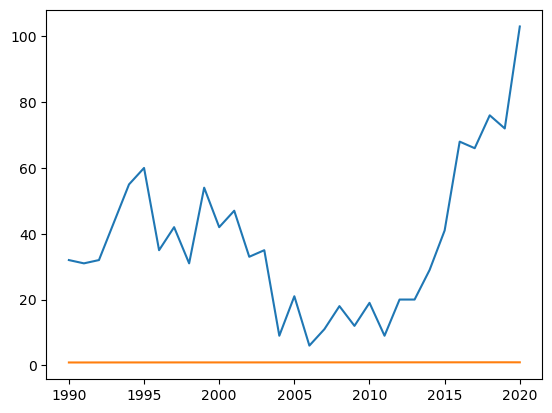

In [35]:
plt.plot(df_ml[df_ml["country"]=="United States"]["year"],df_ml[df_ml["country"]=="United States"]["attacks_count"])
plt.plot(df_ml[df_ml["country"]=="United States"]["year"],df_ml[df_ml["country"]=="United States"]["hdi"])
plt.show()

In [36]:
df_ml["hdi_timess100"]=df_ml["hdi"].apply(lambda x: 100*x)

In [37]:
df_ml

,country,year,hdi,region,attacks_count,log_attacks,hdi_timess100
0,Afghanistan,1990,0.273,South Asia,2,1.098612,27.3
2,Albania,1990,0.647,Eastern Europe,1,0.693147,64.7
3,Argentina,1990,0.723,South America,31,3.465736,72.3
4,Austria,1990,0.825,Western Europe,1,0.693147,82.5
5,Belgium,1990,0.816,Western Europe,2,1.098612,81.6
...,...,...,...,...,...,...,...
2551,United States,2020,0.920,North America,103,4.644391,92.0
2552,Venezuela,2020,0.695,South America,7,2.079442,69.5
2553,Yemen,2020,0.460,Middle East & North Africa,474,6.163315,46.0
2554,South Africa,2020,0.727,Sub-Saharan Africa,17,2.890372,72.7


<Axes: xlabel='year'>

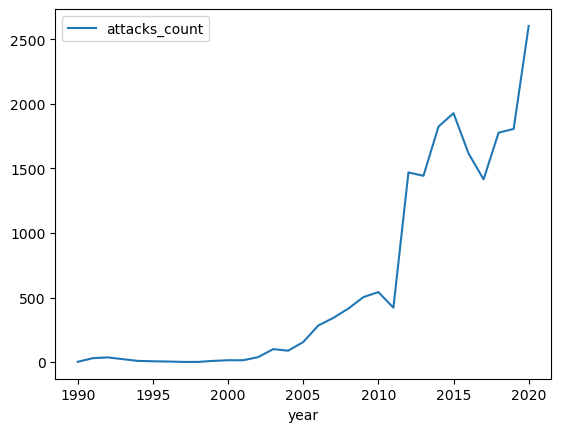

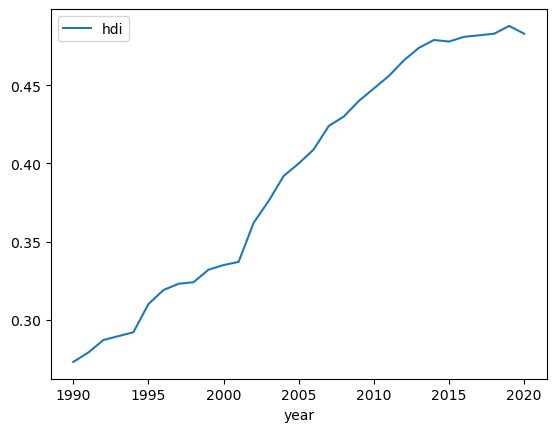

In [38]:
df_ml[df_ml["country"]=="Afghanistan"].plot("year","attacks_count")
df_ml[df_ml["country"]=="Afghanistan"].plot("year","hdi")

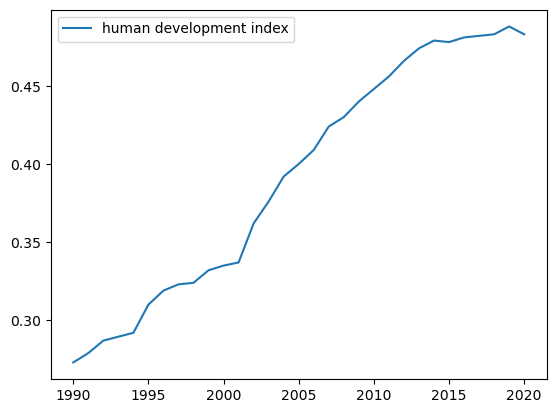

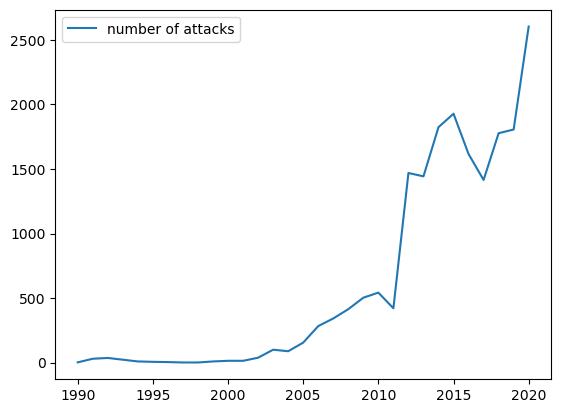

In [39]:
plt.plot(df_ml[df_ml["country"]=="Afghanistan"]["year"],df_ml[df_ml["country"]=="Afghanistan"]["hdi"],label="human development index")

plt.legend()
plt.show()
plt.plot(df_ml[df_ml["country"]=="Afghanistan"]["year"],df_ml[df_ml["country"]=="Afghanistan"]["attacks_count"],label="number of attacks")
plt.legend()
plt.show()

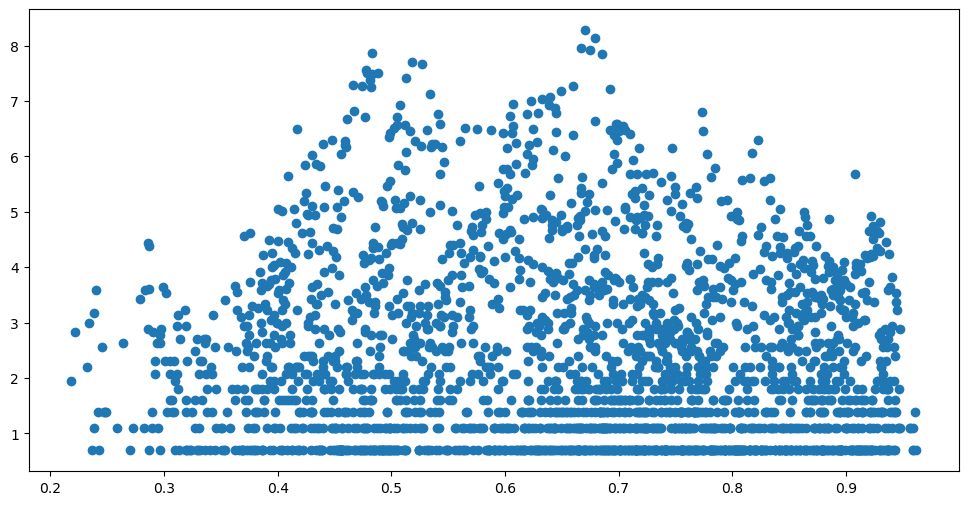

In [40]:
plt.figure(figsize=(12,6))
plt.scatter(df_ml["hdi"],df_ml["log_attacks"])

plt.show()

In [41]:
df_ml

,country,year,hdi,region,attacks_count,log_attacks,hdi_timess100
0,Afghanistan,1990,0.273,South Asia,2,1.098612,27.3
2,Albania,1990,0.647,Eastern Europe,1,0.693147,64.7
3,Argentina,1990,0.723,South America,31,3.465736,72.3
4,Austria,1990,0.825,Western Europe,1,0.693147,82.5
5,Belgium,1990,0.816,Western Europe,2,1.098612,81.6
...,...,...,...,...,...,...,...
2551,United States,2020,0.920,North America,103,4.644391,92.0
2552,Venezuela,2020,0.695,South America,7,2.079442,69.5
2553,Yemen,2020,0.460,Middle East & North Africa,474,6.163315,46.0
2554,South Africa,2020,0.727,Sub-Saharan Africa,17,2.890372,72.7
